In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
import keras

In [2]:
df = pd.read_csv(r"C:\Users\divya\Downloads\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Data understanding**

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['RowNumber'].nunique()

10000

In [7]:
df['RowNumber'].value_counts()

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [8]:
df['CustomerId'].nunique()

10000

In [9]:
df['CustomerId'].value_counts()

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

In [10]:
df['Surname'].nunique()

2932

In [11]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [12]:
df['CreditScore'].nunique()

460

In [13]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [14]:
df['Geography'].nunique()

3

In [15]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df['Gender'].nunique()

2

In [17]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
df['Age'].nunique()

70

In [19]:
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [20]:
df['Tenure'].nunique()

11

In [21]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [22]:
df['Balance'].nunique()

6382

In [23]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [24]:
df['NumOfProducts'].nunique()

4

In [25]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [26]:
df['HasCrCard'].nunique()

2

In [27]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [28]:
df['IsActiveMember'].nunique()

2

In [29]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [30]:
df['EstimatedSalary'].nunique()

9999

In [31]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [32]:
df['Exited'].nunique()

2

In [33]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
Continous = ['CreditScore','Age','Balance','EstimatedSalary']
Categorical = ['Geography','Gender']
Count = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']

**Exploratory Data Analysis (EDA)**

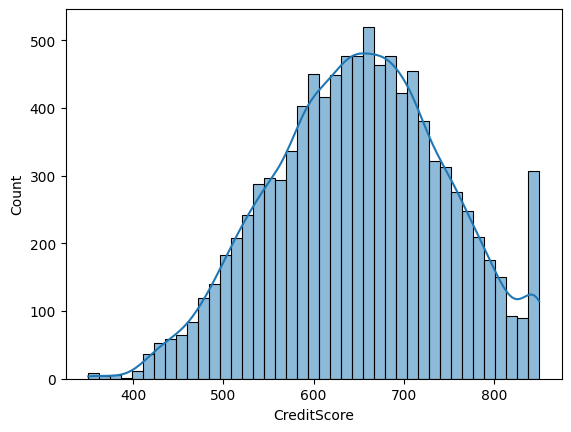

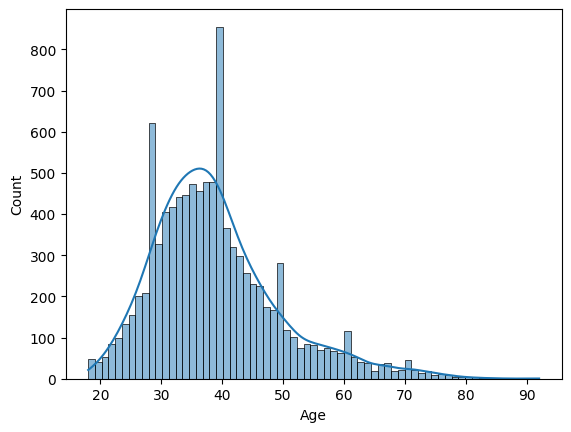

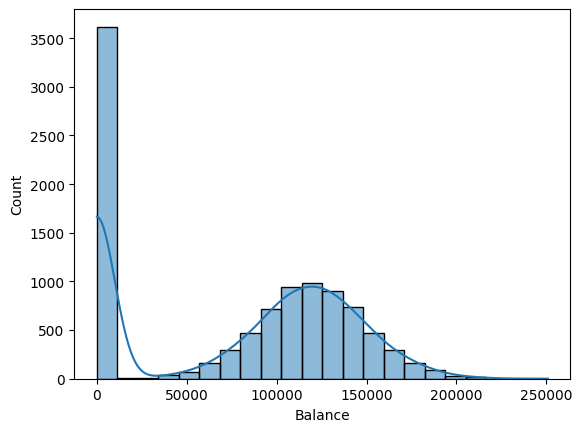

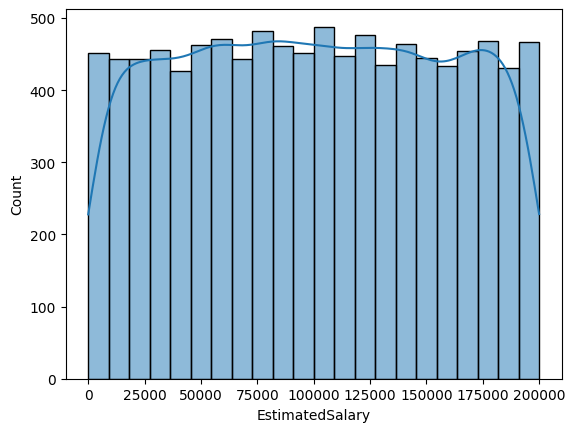

In [38]:
for i in Continous:
    sns.histplot(df[i],kde=True)
    plt.show()

In [39]:
df[Continous].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

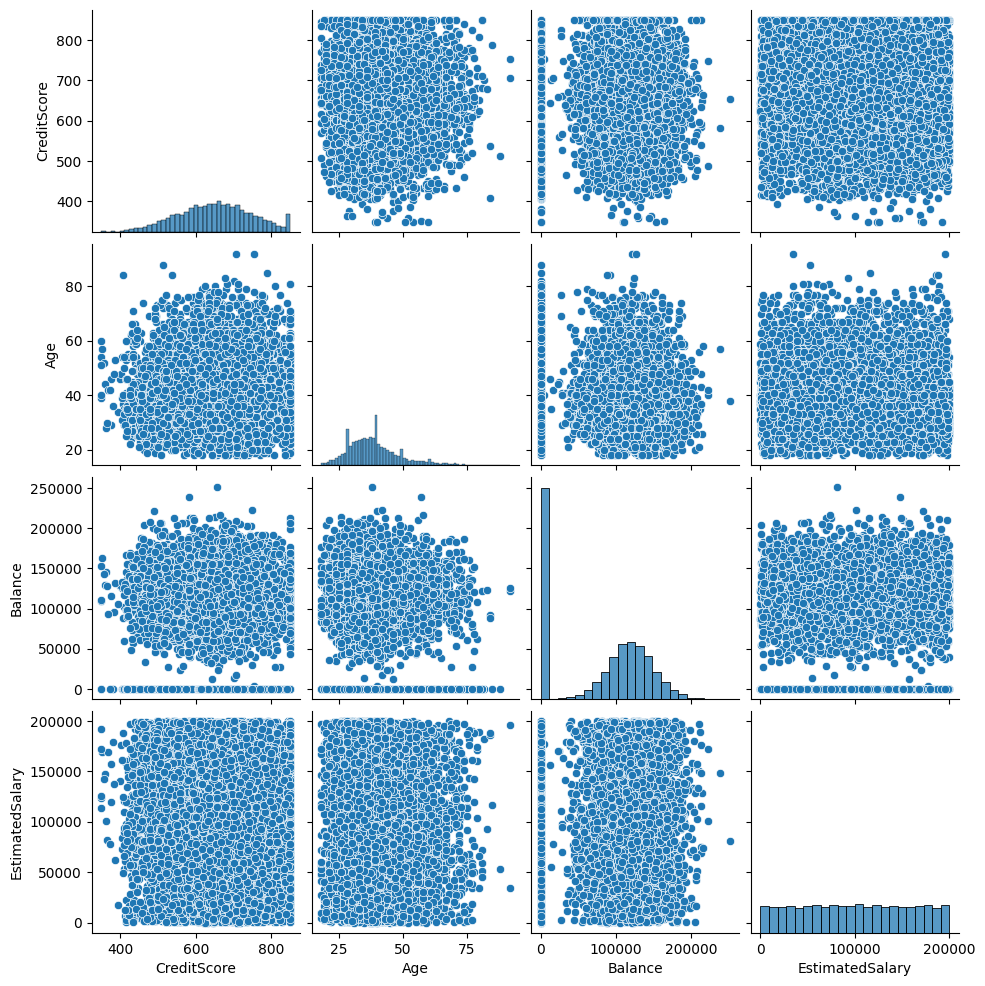

In [40]:
sns.pairplot(df[Continous])
plt.show()

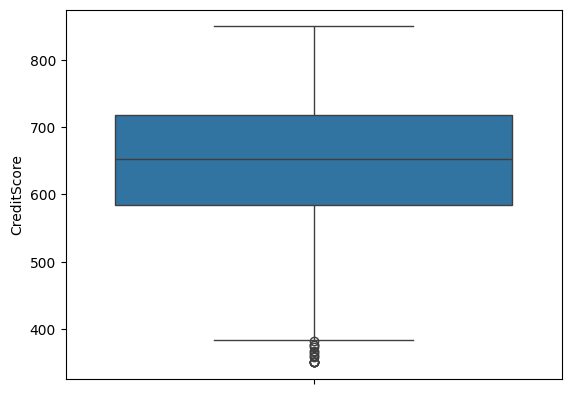

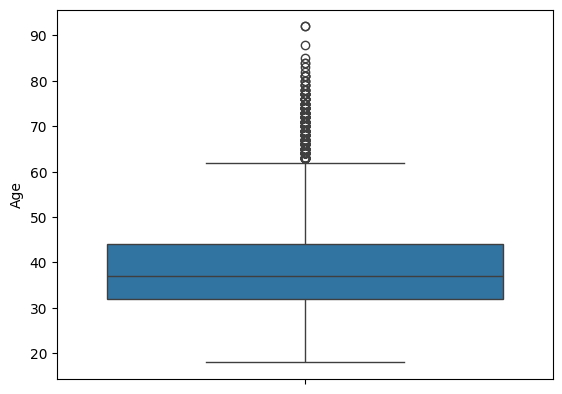

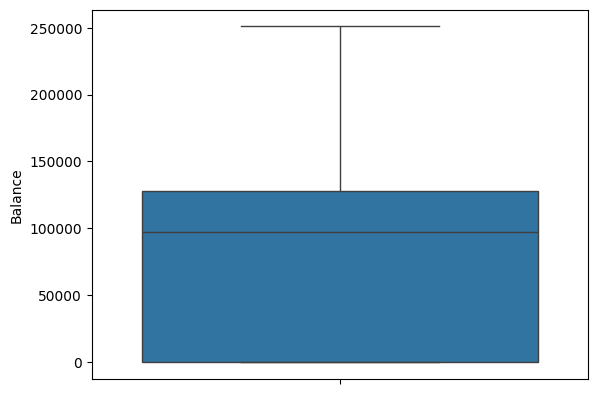

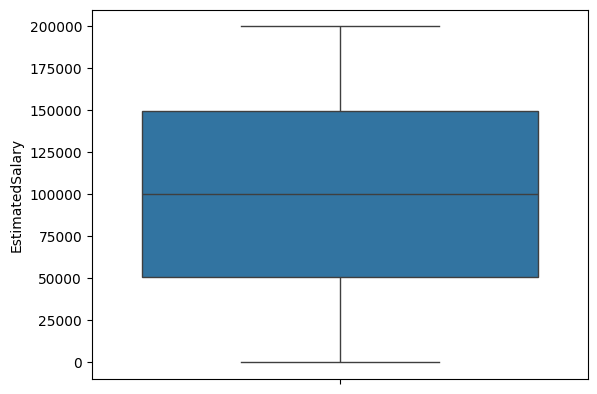

In [41]:
for i in Continous:
    sns.boxplot(df[i])
    plt.show()

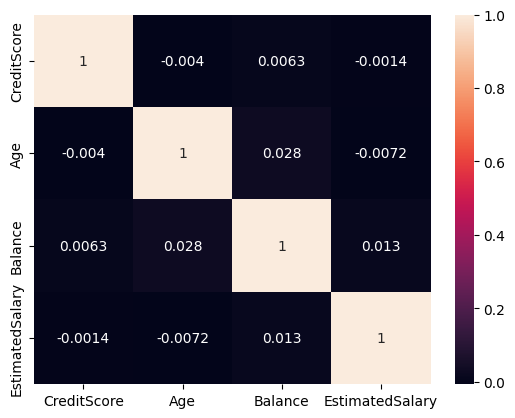

In [42]:
sns.heatmap(df[Continous].corr(),annot=True)
plt.show()

**For Count Variables**

In [44]:
df[Count].describe()

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.012800,1.530200,0.70550,0.515100,0.203700
std,2.892174,0.581654,0.45584,0.499797,0.402769
min,0.000000,1.000000,0.00000,0.000000,0.000000
25%,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7.000000,2.000000,1.00000,1.000000,0.000000
max,10.000000,4.000000,1.00000,1.000000,1.000000


**Data Preprocessing**

- Data already cleaned so no need to cleaning 

In [47]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**X&y**

In [49]:
X = pd.get_dummies(df.drop('Exited',axis=1),drop_first=True)
y = df['Exited']

In [50]:
X 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [51]:
# Splitting the dataset into the Traning set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [52]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Modelling**

**Initializing the Artifical Neural Network**

In [55]:
from keras.models import Sequential
ann = Sequential()

**Adding the input layer and the first hidden layer**

In [57]:

from keras.layers import Dense

ann.add(Dense(input_dim=11, units=6, kernel_initializer='uniform', activation='relu'))

#ann.add(Dropout(rate = 0.1))

**Adding the second hidden layer**

In [59]:
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

#ann.add(DropOut(rate=0.1))

**Adding the output layer**

In [61]:
ann.add(Dense(units=1, kernel_initializer = 'uniform',activation='sigmoid'))

**Compiling the ANN**

In [63]:
ann.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

**Traning the ANN on the Training set**

In [65]:
ann.fit(X_train,y_train,epochs = 100, batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7900 - loss: 0.6378 
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4431  
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: 0.4343  
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4246  
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7993 - loss: 0.4207  
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.4187    
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4149  
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.4187  
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8199 - loss: 0.4190  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.4162  
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8267 - loss: 0.4202  
Epoch 12/100
250/2

# Predictions & Evaluation the model

**predictions**

In [67]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


**Evaluation**

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Test Accuracy:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Test Accuracy: 0.835


array([[1546,   39],
       [ 291,  124]], dtype=int64)

**Cross Validate the Model**

In [71]:
def build_cross_classifier():
    classifier = Sequential()
    classifier.add(Dense(input_dim = 11, units = 6, kernel_initializer = 'uniform',activation='relu'))
    classifier.add(Dense(units = 6, kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [72]:
from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier, batch_size=32,epochs=100)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,X,y,cv=5)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7080 - loss: 0.9365 
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.5346  
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.5120  
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7886 - loss: 0.5288    
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8078 - loss: 0.4987   
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.5106  
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.5104  
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 0.4973  
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7932 - loss: 0.5117  
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.5039    
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7926 - loss: 0.5066  
Epoch 12/100
25

In [73]:
print(accuracies)
accuracies.mean()

[0.792  0.785  0.7985 0.801  0.805 ]


0.7963

# Improving and Tuning the ANN

**This can be done by using 3 options**
 - 1.Hyperparameter Tuning
 -

In [75]:
estimator = KerasClassifier(build_cross_classifier())
param_grid = {'batch_size':[10,32],'epochs':[50,100],'optimizer':['adam','rmsprop']}

In [76]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)

grid_result = grid.fit(X_train, y_train)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7882 - loss: 0.5895
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7940 - loss: 0.4388
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7923 - loss: 0.4269
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8102 - loss: 0.4110
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8310 - loss: 0.4126
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8326 - loss: 0.4129
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8347 - loss: 0.3890
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8277 - loss: 0.4142
Epoch 9/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8336 - loss: 0.4094
Epoch 10/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8441 - loss: 0.3819
Epoch 11/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8386 - loss: 0.3938
Epoch 12/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [77]:
#best parameters
grid_result.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}

In [78]:
#best accuracy
grid_result.best_score_

0.843375

In [79]:
# ── after grid_result = grid.fit(X_train, y_train) ──────────────────────────────
from joblib import dump

best_clf = grid_result.best_estimator_          # scikeras KerasClassifier
dump(best_clf, "churn_ann.joblib")              # writes  ≈25 KB file
print("✓ Model saved to churn_ann.joblib")



✓ Model saved to churn_ann.joblib
